In [2]:
import pandas as pd
import os

In [3]:
data_folder = "../data/exploratory_interpolation/"

depth_e_files = []
depth_a_files  = []
for xslx in os.listdir(data_folder + "depth_E/"):
    depth_e_files.append(pd.read_excel(data_folder + "depth_E/" + xslx))

for xslx in os.listdir(data_folder + "depth_A/"):
    depth_a_files.append(pd.read_excel(data_folder + "depth_A/" + xslx))

depth_e = pd.concat(depth_e_files)
depth_a = pd.concat(depth_a_files)

# Remove Global Polynomial Interpolation – Third order
depth_e = depth_e[depth_e['DESCR'] != 'Global Polynomial Interpolation – Third order']
depth_a = depth_a[depth_a['DESCR'] != 'Global Polynomial Interpolation – Third order']


In [7]:
rank_dict = {}
for interp in depth_a['DESCR'].unique():
    #depth_a_mean = depth_a[depth_a['DESCR'] == interp]['RMSE'].mean()
    depth_e_mean = depth_e[depth_e['DESCR'] == interp]['RMSE'].mean()
    rank_dict[interp] = depth_e_mean

# Create a sorted version of the dictionary
rank_dict = dict(sorted(rank_dict.items(), key=lambda x: x[1]))
print(rank_dict)

{'Empirical Bayesian Kriging - Advanced': 0.03667802473296413, 'Simple Kriging – Optimized': 0.04481273722585399, 'Simple Kriging – Default': 0.044958069104397244, 'Empirical Bayesian Kriging - Default': 0.04505960713185403, 'Ordinary Kriging – Optimized': 0.04600871661678291, 'Radial Basis Functions - Inverse multiquadric': 0.04621729367567406, 'Universal Kriging – Optimized': 0.046585369930793784, 'Ordinary Kriging – Default': 0.047406611883911966, 'Kernel Interpolation': 0.04753033544952704, 'Radial Basis Functions - Spline with tension': 0.0483164784695267, 'Radial Basis Functions - Completely regularized spline': 0.048442623470607675, 'Radial Basis Functions - Multiquadric': 0.049327878844075045, 'Inverse Distance Weighted - Optimized': 0.05005993666744833, 'Simple Kriging – Trend and transformation': 0.050591677345272604, 'Simple Kriging – Trend': 0.05066770381974607, 'Inverse Distance Weighted - Default': 0.052003980841846625, 'Global Polynomial Interpolation – Second order': 0.

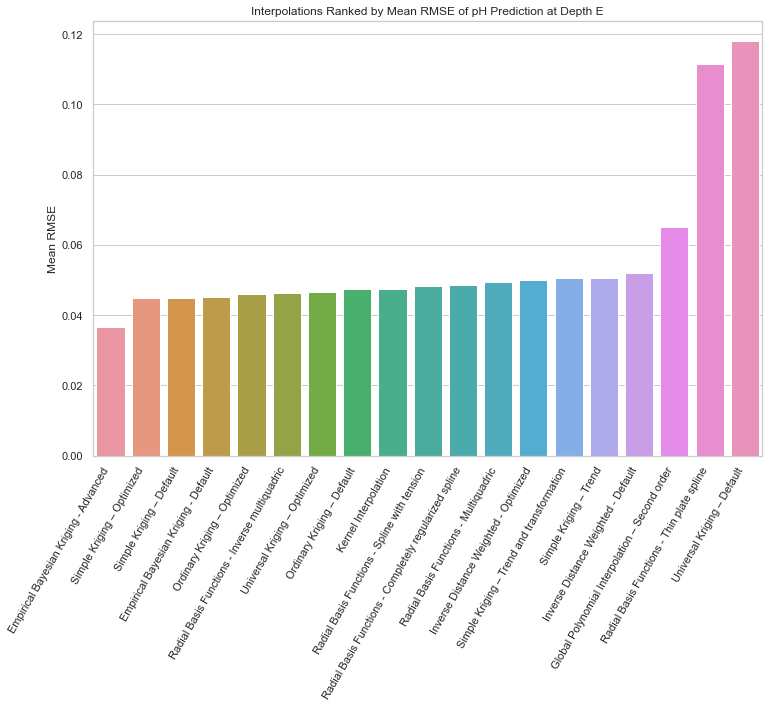

In [8]:
# Create a chart of the rank dict
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x=list(rank_dict.keys()), y=list(rank_dict.values()))
plt.setp(bar.get_xticklabels(), rotation=60, horizontalalignment='right')
ax.set_title("Interpolations Ranked by Mean RMSE of pH Prediction at Depth E")
ax.set_ylabel("Mean RMSE")
plt.show()

In [10]:
rank_dict

{'Kernel Interpolation': 10.153846153846153,
 'Empirical Bayesian Kriging - Advanced': 2.3846153846153846,
 'Simple Kriging – Default': 7.051282051282051,
 'Simple Kriging – Optimized': 6.923076923076923,
 'Radial Basis Functions - Inverse multiquadric': 9.025641025641026,
 'Inverse Distance Weighted - Optimized': 10.58974358974359,
 'Inverse Distance Weighted - Default': 13.435897435897436,
 'Radial Basis Functions - Spline with tension': 9.717948717948717,
 'Radial Basis Functions - Completely regularized spline': 10.717948717948717,
 'Empirical Bayesian Kriging - Default': 6.871794871794871,
 'Universal Kriging – Optimized': 9.128205128205128,
 'Radial Basis Functions - Multiquadric': 11.0,
 'Ordinary Kriging – Optimized': 7.846153846153846,
 'Simple Kriging – Trend': 11.717948717948717,
 'Simple Kriging – Trend and transformation': 11.666666666666666,
 'Ordinary Kriging – Default': 9.743589743589743,
 'Radial Basis Functions - Thin plate spline': 15.205128205128204,
 'Global Polyno